In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from skimage import io

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# !pip install wordcloud
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# TASK 1

## PCA

In [2]:
table = pd.read_csv('gender_classification.csv')

In [3]:
labelEncoder = LabelEncoder()

labels = ['LongHair', 'ForeheadWidth', 'ForeheadHeight', 'NoseWide', 'NoseLong','LipsThin', 'DistanceNoseToLipLong', 'Gender']

for label in labels:
    table[label] = labelEncoder.fit_transform(table[label])

In [4]:
X = table.drop('Gender', axis = 1)
Y = table['Gender']

standardScaler = StandardScaler()
X_s = standardScaler.fit_transform(X)

In [5]:
pca = PCA(n_components = 2, random_state = 0)
X_pca = pca.fit_transform(X_s)

Text(0.5, 1.0, 'PSA')

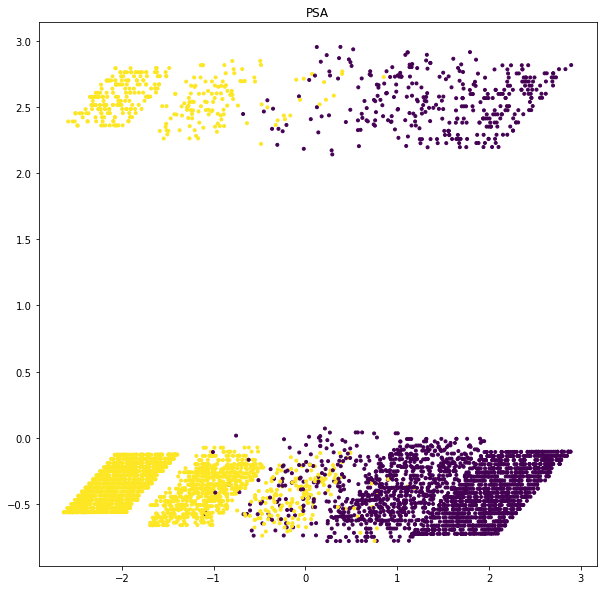

In [6]:
plt.figure(figsize = (10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y, marker = '.')
plt.title('PSA')

In [7]:
pca.explained_variance_ratio_

array([0.41764892, 0.14354932])

In [8]:
pca.singular_values_

array([120.9158214 ,  70.88886468])

## TSNE

In [9]:
tsne = TSNE(n_components = 2, random_state = 0)
X_tsne = tsne.fit_transform(X_s)

Text(0.5, 1.0, 'TSNE')

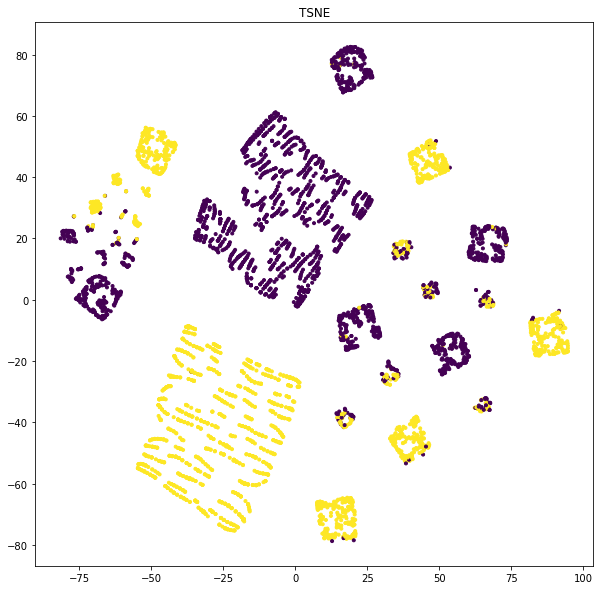

In [10]:
plt.figure(figsize = (10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = Y, marker = '.')
plt.title('TSNE')

In [11]:
X_tsne.shape

(5001, 2)

# Cluster analysis

## Image quantization

In [12]:
colors = 8

img = plt.imread('food.jpg')
print(img.shape)

(417, 626, 3)


In [13]:
w, h, d = original_shape = tuple(img.shape)

In [14]:
assert d == 3
image_array = np.reshape(img, (w * h, d))

In [15]:
image_array_sample = shuffle(image_array, random_state = 0, n_samples = 1_000)
kmeans = KMeans(n_clusters = colors, random_state = 0).fit(image_array_sample)
labels = kmeans.predict(image_array)

In [16]:
codebook_random = shuffle(image_array, random_state = 0, n_samples = colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

In [17]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

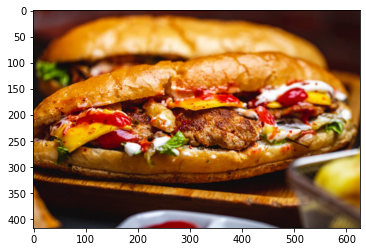

In [18]:
plt.imshow(img)

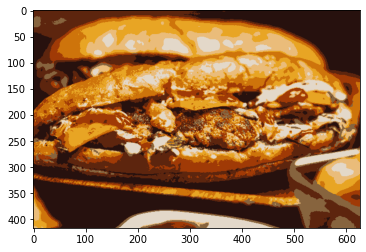

In [19]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

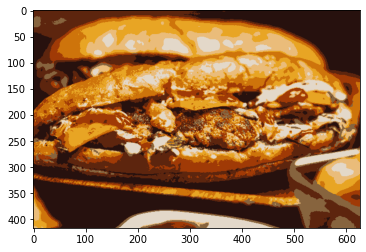

In [20]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

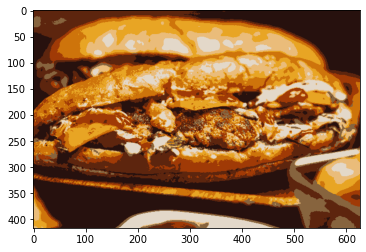

In [21]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

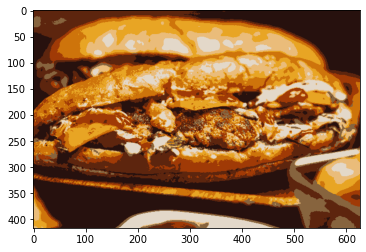

In [22]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## Generating data

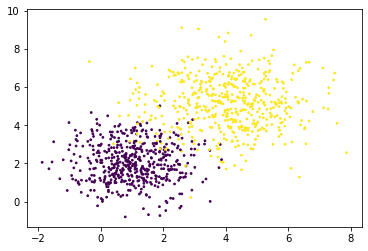

In [23]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]

mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]

X_1 = np.random.multivariate_normal(mean_1, cov_1, 500)
X_2 = np.random.multivariate_normal(mean_2, cov_2, 500)

X = np.concatenate([X_1, X_2])
Y = np.array([0] * 500 + [1] * 500)
X, Y = shuffle(X, Y, random_state = 500)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = Y)

In [24]:
for i in range(2, 5):
    gmm = GaussianMixture(n_components = i, covariance_type = 'full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, ',', "Silhouette average:", silhouette_avg)

For n_clusters = 2 , Silhouette average: 0.546076766303064
For n_clusters = 3 , Silhouette average: 0.45671299310143026
For n_clusters = 4 , Silhouette average: 0.4092735024905074


In [25]:
GMM = GaussianMixture(n_components = 2, covariance_type = 'full')
GMM.fit(X)

GaussianMixture(n_components=2)

In [26]:
print('Means:')
print(GMM.means_)

Means:
[[4.17048516 5.21581805]
 [1.07489489 2.1217992 ]]


In [27]:
print('Covariances:')
print(GMM.covariances_)

Covariances:
[[[ 1.71654966 -0.1568716 ]
  [-0.1568716   1.80335779]]

 [[ 1.04558794  0.02012964]
  [ 0.02012964  1.19133957]]]


In [28]:
print("Weights:")
print(GMM.weights_)

Weights:
[0.4712652 0.5287348]


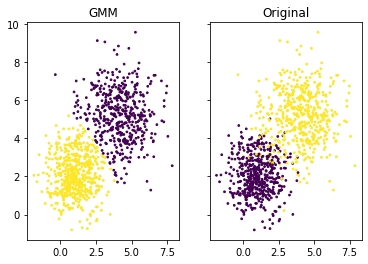

In [29]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.set_title('GMM')
ax1.scatter(X[:, 0], X[:, 1], c = labels, s = 3)
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c = Y, s = 3)

In [30]:
mean_11 = GMM.means_[0]
cov_11 = GMM.covariances_[0]

mean_21 = GMM.means_[1]
cov_21 = GMM.covariances_[1]

X_11 = np.random.multivariate_normal(mean_11, cov_11, 500)
X_21 = np.random.multivariate_normal(mean_21, cov_21, 500)

X1 = np.concatenate([X_11, X_21])
Y1 = np.array([0] * 500 + [1] * 500)

X1, Y1 = shuffle(X1, Y1, random_state = 500)

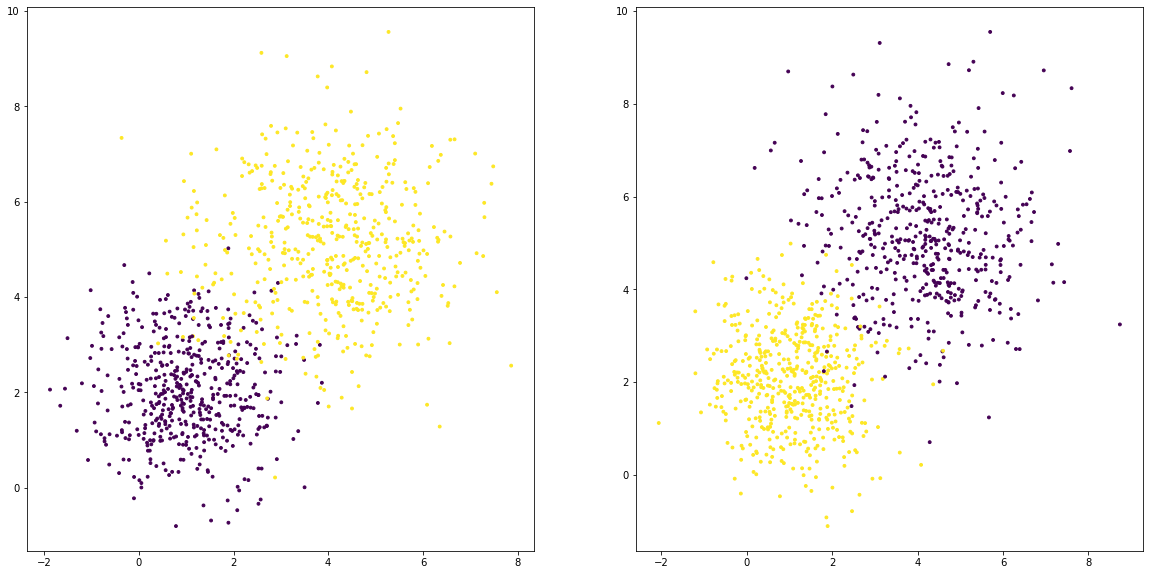

In [31]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s = 8, c = Y)
plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], s = 8, c = Y1)

# Text data processing

In [32]:
textData = pd.read_csv('kick_starter.csv')

In [33]:
textData = textData.drop('Id', axis = 1)

In [34]:
# nltk.download("stopwords")
# nltk.download('punkt')
stop_words = stopwords.words('english')

In [35]:
textData.head()

,Blur,State
0,"Using their own character, users go on educati...",failed
1,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
2,"A small indie press, run as a collective for a...",failed
3,Zylor is a new baby cosplayer! Back this kicks...,failed
4,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed


In [36]:
textData.isna().sum()

Blur     3
State    0
dtype: int64

In [37]:
def prepare_data(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    clean_text = []
    stemmer = PorterStemmer()
    for word in word_tokenize(text):
        if word not in stop_words and word.isalpha():
            word = stemmer.stem(word)
            clean_text.append(word)
    return ' '.join(clean_text) 

In [38]:
textData.Blur = textData.Blur.apply(prepare_data)

In [39]:
textData.head()

,Blur,State
0,use charact user go educ quest around virtual ...,failed
1,microfli quadcopt pack wifi sensor processor u...,successful
2,small indi press run collect author want selfp...,failed
3,zylor new babi cosplay back kickstart help fun...,failed
4,hato boyfriend meet skeleton comedi date sim p...,failed


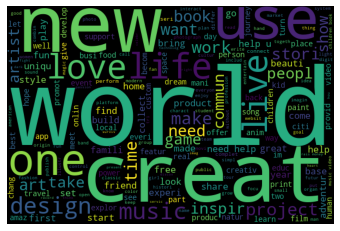

In [40]:
text = ''
for message in textData[textData['State'] == 'failed']['Blur']:
    text += message + ' '
wordcloud = WordCloud(width = 600, height = 400, background_color = "black").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

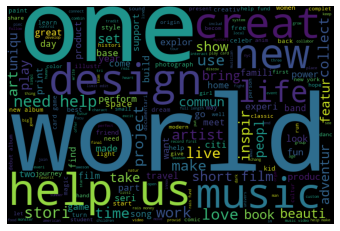

In [41]:
text = ''
for message in textData[textData['State'] == 'successful']['Blur']:
    text += message + ' '
wordcloud = WordCloud(width = 600, height = 400, background_color = "black").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
X = textData.Blur
Y = textData.State 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [43]:
tfidfvectorizer = TfidfVectorizer(stop_words = 'english')
fitted = tfidfvectorizer.fit(X_train)
X_train = fitted.transform(X_train)
X_test = fitted.transform(X_test)

In [44]:
randomForest = RandomForestClassifier(n_estimators = 10, max_depth = 50).fit(X_train, Y_train)
pred = randomForest.predict(X_test)

In [45]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      failed       0.60      0.69      0.64     31913
  successful       0.64      0.54      0.59     32741

    accuracy                           0.62     64654
   macro avg       0.62      0.62      0.61     64654
weighted avg       0.62      0.62      0.61     64654



In [46]:
vectorizer = CountVectorizer(stop_words = 'english')
data_vector = vectorizer.fit_transform(X)
lda = LatentDirichletAllocation(n_components = 2).fit(data_vector)

In [47]:
feature_names = vectorizer.get_feature_names()
num_top_words = 10

for topic_ind, topic in enumerate(lda.components_):
    print(f'Topic {topic_ind}: {[feature_names[i] for i in topic.argsort()[-1: -num_top_words:-1]]}')

Topic 0: ['help', 'new', 'music', 'need', 'album', 'record', 'film', 'make', 'fund']
Topic 1: ['book', 'game', 'world', 'design', 'creat', 'art', 'use', 'new', 'make']
